# **Projeto: Previsão de Intenção de Compra de Clientes em Loja Web**

**Descrição do Projeto**

Neste projeto, nosso objetivo é criar um sistema inteligente para antecipar a intenção de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes têm maior probabilidade de realizar compras online, com base em suas características e comportamentos passados. Essa capacidade de prever a intenção de compra não só aprimorará a experiência do cliente, mas também permitirá que a empresa direcione seus esforços de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes, incluindo:

Dados demográficos (idade, renda, etc.)

Informações sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumDealsPurchases: Número de compras feitas com desconto

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.






**WebPurchases: Número de compras feitas pelo site da empresa.**

# ETAPA 1:

**Preparação dos Dados**

**Exploração e Limpeza:** Analisar e limpar os dados para garantir que estejam prontos para a modelagem.

**Análise:** Construa uma storytelling com gráficos, analisando e retirando insights das informações.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

   Year_Birth   Education Marital_Status   Income  Kidhome  Recency  MntWines  \
0        1957  Graduation         Single  58138.0        0       58       635   
1        1954  Graduation         Single  46344.0        1       38        11   
2        1965  Graduation       Together  71613.0        0       26       426   
3        1984  Graduation       Together  26646.0        1       26        11   
4        1981         PhD        Married  58293.0        1       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   
3          4               20               10                 3   
4         43              118               46                27   

   MntGoldProds  NumStorePurchases  NumWebVisitsMonth  Complain  WebPurchases  
0            88         

/tmp/ipython-input-14-455276035.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(median_income, inplace=True)


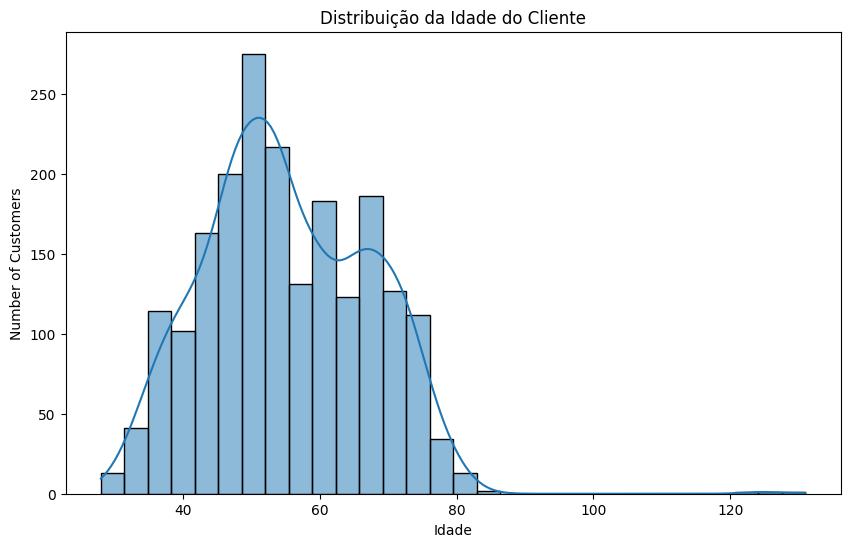

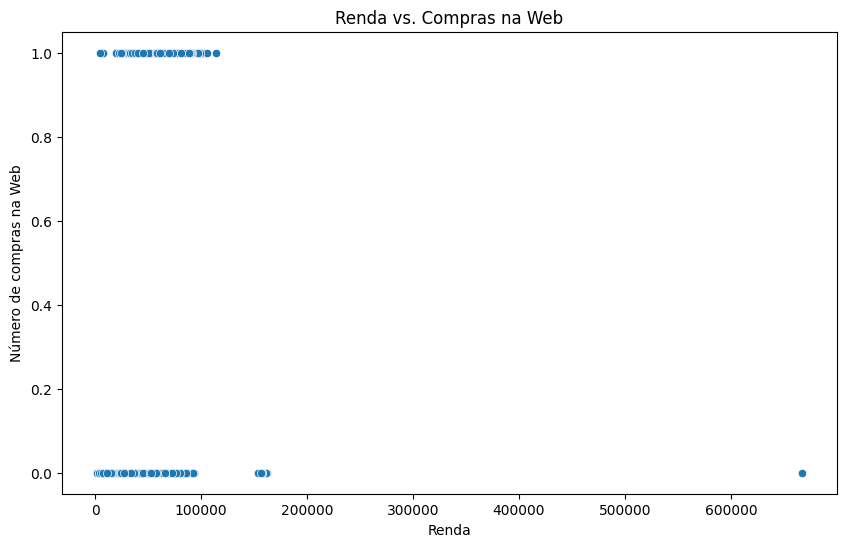

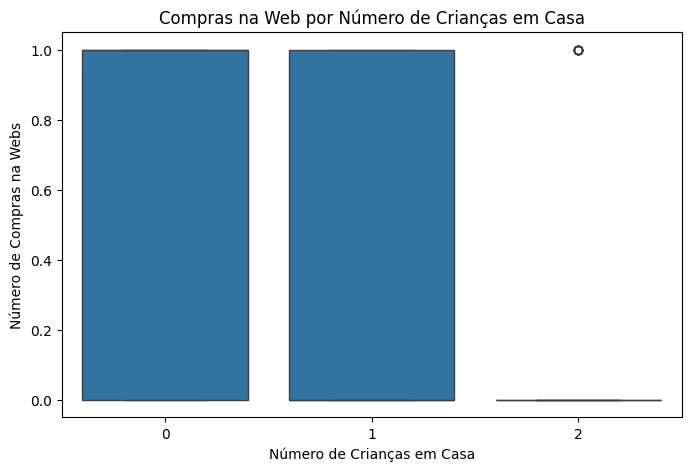

In [ ]:
df = pd.read_csv('/content/marketing_campaign.csv', sep=';')

print(df.head())

print("\nDataset Info:")
df.info()

# Verificando a presença de dados nulos
print("\nVerificando a presença de dados nulos:")
print(df.isnull().sum())

# Valores ausentes de Heandle (exemplo: preencher 'Renda' com a mediana)
if df['Income'].isnull().sum() > 0:
  median_income = df['Income'].median()
  df['Income'].fillna(median_income, inplace=True)
  print(f"\nValores ausentes de Heandle (exemplo: preencher 'Renda' com a mediana: {median_income}")

# Verifique se há linhas duplicadas
print("\nVerifique se há linhas duplicadas:", df.duplicated().sum())

# Removendo linhas duplicadas
df.drop_duplicates(inplace=True)
print("Removendo linhas duplicadas.")

# Estatísticas básicas
print("\nEstatísticas básicas:")
print(df.describe())

# Análise de Dados e Narrativa

# Storytelling 1: Distribuição etária e seu potencial impacto no comportamento de compra
df['Age'] = 2024 - df['Year_Birth'] # Supondo que o ano atual seja 2024
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribuição da Idade do Cliente')
plt.xlabel('Idade')
plt.ylabel('Number of Customers')

# Insight: Entenda o perfil etário da base de clientes. Há faixas etárias específicas que predominam?

# Storytelling 2: Relação entre Renda e Compras na Web
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='WebPurchases', data=df)
plt.title('Renda vs. Compras na Web')
plt.xlabel('Renda')
plt.ylabel('Número de compras na Web')
plt.show()

# Insight: Existe uma tendência visível? Clientes com renda mais alta tendem a fazer mais compras online?

# Storytelling 3: Impacto do número de crianças em casa nas compras pela internet
plt.figure(figsize=(8, 5))
sns.boxplot(x='Kidhome', y='WebPurchases', data=df)
plt.title('Compras na Web por Número de Crianças em Casa')
plt.xlabel('Número de Crianças em Casa')
plt.ylabel('Número de Compras na Webs')
plt.show()


# ETAPA 2:
**Pré-processamento**

**Análise Correlação:** Verifique a correlação entre as váriaveis e análise se há espaço para retirar váriaveis que não te parecem importantes.

**Codificação de Variáveis Categóricas:** Transformar variáveis categóricas em um formato que os modelos de machine learning possam interpretar.


**Separe a base em Y, X e Treino e teste:**: Faça a separação da base.

**Realize a padronização dos dados**: Padronize os dados para garantir eficiência no modelo e eficácia.








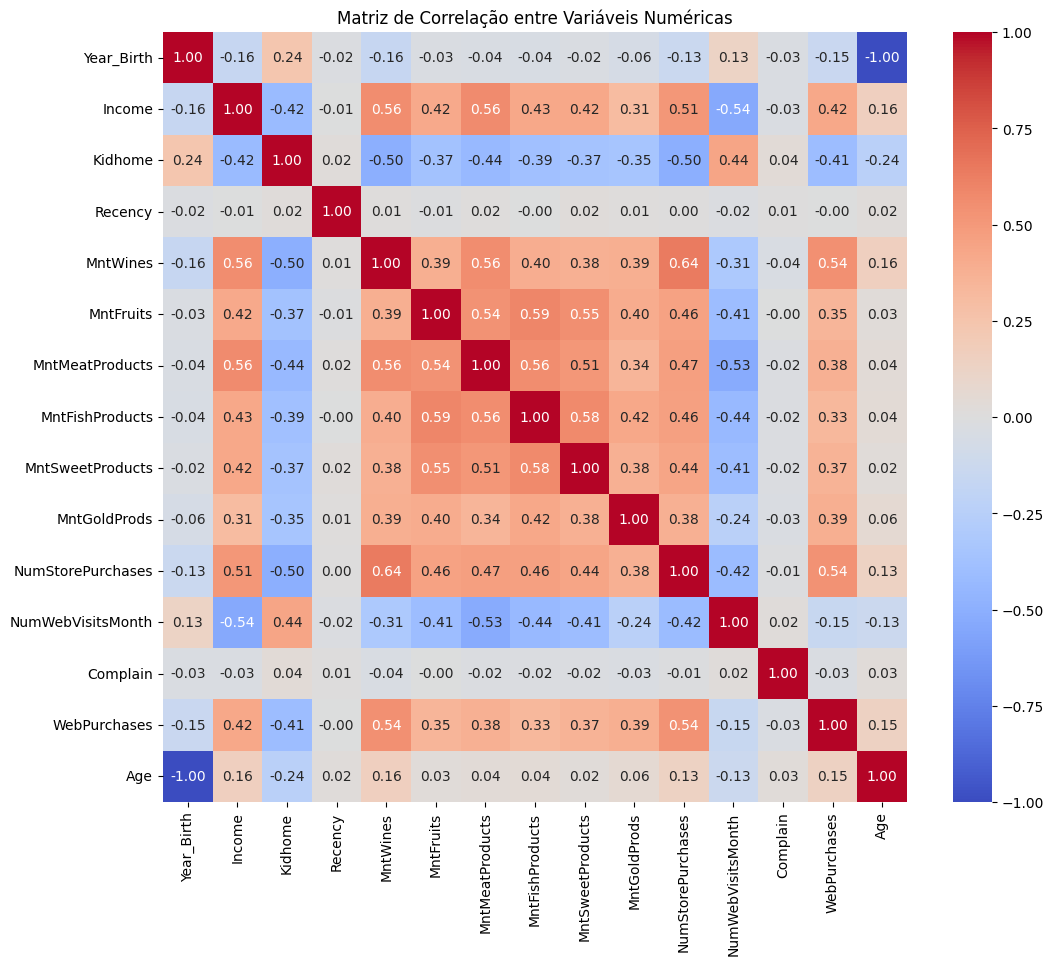


Shape of X_train_processed: (1631, 26)
Shape of X_test_processed: (408, 26)
Shape of Y_train: (1631,)
Shape of Y_test: (408,)


In [ ]:
# Calculando a matriz de correlação
correlation_matrix = df.corr(numeric_only=True)

# Plotando o heatmap da correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

# Analisando a correlação e considerando a remoção de variáveis (exemplo)
# Variáveis com alta correlação entre si ou baixa correlação com a variável target (WebPurchases)
# Podem ser consideradas para remoção, dependendo da análise e do modelo a ser utilizado.
# Por exemplo, se MntWines, MntMeatProducts e MntFishProducts estão altamente correlacionadas
# e uma ou duas têm baixa correlação com WebPurchases, podemos considerar remover as de menor correlação.
# Esta é uma etapa subjetiva e depende da análise mais aprofundada.
# Por agora, vamos manter todas as variáveis para a demonstração.

# Codificação de Variáveis Categóricas

# Identificando variáveis categóricas
categorical_features = df.select_dtypes(include=['object']).columns

# Separando a base em Y (target) e X (features)
Y = df['WebPurchases']
X = df.drop(columns=['WebPurchases', 'Year_Birth'])

# Identificando variáveis numéricas após a remoção da target e colunas irrelevantes
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

# Garantindo que 'Age' está nas variáveis numéricas e excluindo variáveis categóricas
numerical_features = [col for col in numerical_features if col not in categorical_features]

# Criando os pré-processadores para variáveis numéricas e categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Separando a base em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Aplicando o pré-processamento (padronização e codificação) aos dados de treino e teste
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("\nShape of X_train_processed:", X_train_processed.shape)
print("Shape of X_test_processed:", X_test_processed.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

# ETAPA 3:

**Modelagem**

Escolha ao menos 2 técnicas de machine learning e rode 2 modelos, afim de identificar qual tem o melhor resultado para essa base. Lembrando que estamos lidando com uma classificação binária.

In [ ]:
# Para classificação binária, precisamos definir um limiar para as compras na web.
# Uma abordagem comum é considerar uma compra na web como 1 e zero compras como 0.
# Vamos criar uma nova coluna 'WebPurchaseBinary' onde 1 significa que o cliente fez pelo menos 1 compra na web.

df['WebPurchaseBinary'] = (df['WebPurchases'] > 0).astype(int)

# Atualizando a variável target para a classificação binária
Y_binary = df['WebPurchaseBinary']
X_binary = df.drop(columns=['WebPurchases', 'Year_Birth', 'WebPurchaseBinary'])

# Identificando variáveis categóricas novamente (sem 'WebPurchaseBinary')
categorical_features_binary = X_binary.select_dtypes(include=['object']).columns

# Identificando variáveis numéricas (sem as colunas removidas e categóricas)
numerical_features_binary = X_binary.select_dtypes(include=np.number).columns.tolist()
numerical_features_binary = [col for col in numerical_features_binary if col not in categorical_features_binary]

# Criando o pré-processador para a tarefa de classificação binária
preprocessor_binary = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_binary),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_binary)])

# Separando a base em treino e teste para a classificação binária
X_train_binary, X_test_binary, Y_train_binary, Y_test_binary = train_test_split(X_binary, Y_binary, test_size=0.2, random_state=42, stratify=Y_binary) # Usando stratify para garantir proporções de classes

# Aplicando o pré-processamento
X_train_processed_binary = preprocessor_binary.fit_transform(X_train_binary)
X_test_processed_binary = preprocessor_binary.transform(X_test_binary)

print("\n--- Modelagem para Classificação Binária ---")

# Modelo 1: Regressão Logística
print("\nTreinando Modelo de Regressão Logística...")
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_processed_binary, Y_train_binary)
Y_pred_logistic = logistic_model.predict(X_test_processed_binary)
Y_proba_logistic = logistic_model.predict_proba(X_test_processed_binary)[:, 1] # Probabilidades para ROC AUC

# Avaliação do Modelo de Regressão Logística
print("\nMétricas de Avaliação - Regressão Logística:")
print(f"Acurácia: {accuracy_score(Y_test_binary, Y_pred_logistic):.4f}")
print(f"Precisão: {precision_score(Y_test_binary, Y_pred_logistic):.4f}")
print(f"Recall: {recall_score(Y_test_binary, Y_pred_logistic):.4f}")
print(f"F1-Score: {f1_score(Y_test_binary, Y_pred_logistic):.4f}")
print(f"ROC AUC Score: {roc_auc_score(Y_test_binary, Y_proba_logistic):.4f}")

# Modelo 2: Random Forest Classifier
print("\nTreinando Modelo Random Forest Classifier...")
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_processed_binary, Y_train_binary)
Y_pred_rf = random_forest_model.predict(X_test_processed_binary)
Y_proba_rf = random_forest_model.predict_proba(X_test_processed_binary)[:, 1] # Probabilidades para ROC AUC

# Avaliação do Modelo Random Forest
print("\nMétricas de Avaliação - Random Forest Classifier:")
print(f"Acurácia: {accuracy_score(Y_test_binary, Y_pred_rf):.4f}")
print(f"Precisão: {precision_score(Y_test_binary, Y_pred_rf):.4f}")
print(f"Recall: {recall_score(Y_test_binary, Y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(Y_test_binary, Y_pred_rf):.4f}")
print(f"ROC AUC Score: {roc_auc_score(Y_test_binary, Y_proba_rf):.4f}")

# Comparação e Conclusão
print("\n--- Comparação dos Modelos ---")
print("Observe as métricas de avaliação para ambos os modelos.")
print("Um bom modelo para classificação binária deve ter um alto Recall e Precision (ou F1-Score) e um alto ROC AUC Score.")
print("O modelo com as melhores métricas no conjunto de teste é geralmente considerado o melhor para este problema.")



--- Modelagem para Classificação Binária ---

Treinando Modelo de Regressão Logística...

Métricas de Avaliação - Regressão Logística:
Acurácia: 0.8309
Precisão: 0.8743
Recall: 0.7767
F1-Score: 0.8226
ROC AUC Score: 0.9086

Treinando Modelo Random Forest Classifier...

Métricas de Avaliação - Random Forest Classifier:
Acurácia: 0.9020
Precisão: 0.8843
Recall: 0.9272
F1-Score: 0.9052
ROC AUC Score: 0.9624

--- Comparação dos Modelos ---
Observe as métricas de avaliação para ambos os modelos.
Um bom modelo para classificação binária deve ter um alto Recall e Precision (ou F1-Score) e um alto ROC AUC Score.
O modelo com as melhores métricas no conjunto de teste é geralmente considerado o melhor para este problema.


# ETAPA 4:

**Avaliação**

Avalie os resultados encontrados nos dois modelos e identifique qual te pareceu realizar melhor as previsões.

Utilize além das métricas padrões a matriz de confusão.


Matriz de Confusão - Regressão Logística:
[[179  23]
 [ 46 160]]


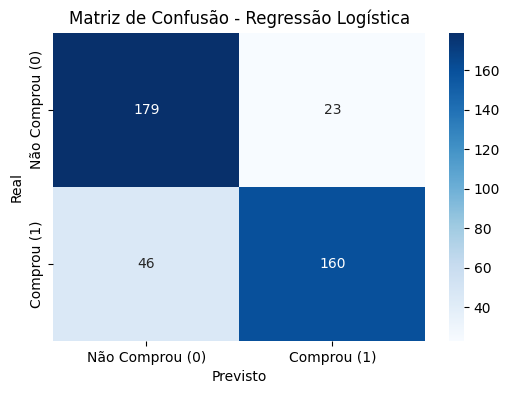


Matriz de Confusão - Random Forest Classifier:
[[177  25]
 [ 15 191]]


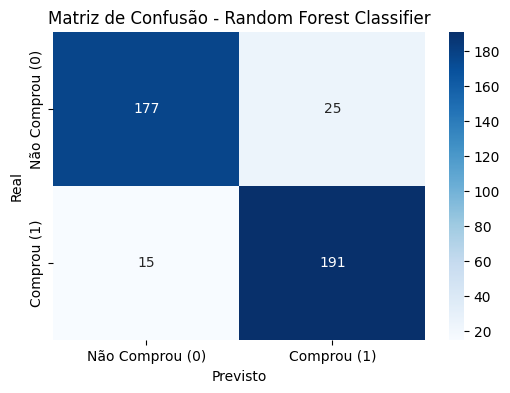


--- Análise dos Resultados ---
Comparando as métricas de avaliação (Acurácia, Precisão, Recall, F1-Score, ROC AUC) e as Matrizes de Confusão:
- True Positives (TP): Clientes que compraram e foram previstos como compradores.
- True Negatives (TN): Clientes que não compraram e foram previstos como não compradores.
- False Positives (FP): Clientes que não compraram mas foram previstos como compradores (Erro Tipo I).
- False Negatives (FN): Clientes que compraram mas foram previstos como não compradores (Erro Tipo II).


In [ ]:
# Matriz de Confusão para Regressão Logística
print("\nMatriz de Confusão - Regressão Logística:")
cm_logistic = confusion_matrix(Y_test_binary, Y_pred_logistic)
print(cm_logistic)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Comprou (0)', 'Comprou (1)'], yticklabels=['Não Comprou (0)', 'Comprou (1)'])
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Matriz de Confusão para Random Forest Classifier
print("\nMatriz de Confusão - Random Forest Classifier:")
cm_rf = confusion_matrix(Y_test_binary, Y_pred_rf)
print(cm_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Comprou (0)', 'Comprou (1)'], yticklabels=['Não Comprou (0)', 'Comprou (1)'])
plt.title('Matriz de Confusão - Random Forest Classifier')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Análise e Conclusão
print("\n--- Análise dos Resultados ---")
print("Comparando as métricas de avaliação (Acurácia, Precisão, Recall, F1-Score, ROC AUC) e as Matrizes de Confusão:")
print("- True Positives (TP): Clientes que compraram e foram previstos como compradores.")
print("- True Negatives (TN): Clientes que não compraram e foram previstos como não compradores.")
print("- False Positives (FP): Clientes que não compraram mas foram previstos como compradores (Erro Tipo I).")
print("- False Negatives (FN): Clientes que compraram mas foram previstos como não compradores (Erro Tipo II).")